# ME 7160 Project


### Solution to ODE via FFT method:

#### Following linear equation was solved as a verification of the method

**$\ddot{x} + \dot{x} + x = cos(2t)sin(5t)$**

Since method of harmonic balance is valid for steady state response the particular solution to the above problem was also plotted to compare with the numerical results:

**$X_p = Acos(2t)cos(5t) + Bsin(2t)sin(5t) + Ccos(2t)sin(5t) + Dsin(2t)cos(5t)$**, where

- A = $\frac{-3785}{171769}$


- B = $\frac{-3274}{171769}$


- C = $\frac{-11164}{171769}$


- D = $\frac{7660}{171769}$

         Current function value: 0.000306
         Iterations: 76
         Function evaluations: 8603
         Gradient evaluations: 121
Values of x after optimization:
[-0.02414813 -0.04394757 -0.05832952 -0.06529561 -0.06467242 -0.05798953
 -0.0477835  -0.03660816 -0.02613954 -0.01671877 -0.00749774  0.00289052
  0.01542504  0.02993721  0.04482445  0.05737573  0.06460377  0.06427422
  0.05573837  0.04024562  0.0206088   0.00034205 -0.01740789 -0.03074064
 -0.03937247 -0.0443804  -0.04744796 -0.04993327 -0.05214559 -0.05312855
 -0.05104227 -0.04399377 -0.03098159 -0.01256868  0.00900139  0.03031567
  0.04775706  0.05857229  0.0616494   0.05772196  0.04893686  0.03796638
  0.02701637  0.01711588  0.00795565 -0.00167908 -0.01307464 -0.0267076
 -0.0416904  -0.05578861 -0.06602778 -0.06967158 -0.06520114 -0.05291808
 -0.03493389 -0.01454188  0.00479668  0.02047463  0.03139295  0.03801716
  0.04184199  0.0445005   0.04689017  0.04867642  0.04837921  0.044012
  0.03401799  0.0181241  -0.002

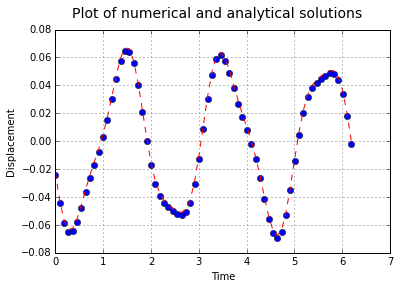

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 70 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)*np.sin(5*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

A = (-3785/171769)
B = (-3274/171769)
C = (-11164/171769)
D = (7660/171769)

Analytical = (A)*np.cos(2*t)*np.cos(5*t) + (B)*np.sin(2*t)*np.sin(5*t) + (C)*np.cos(2*t)*np.sin(5*t)\
            + (D)*np.sin(2*t)*np.cos(5*t)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot(t, sol.x, 'bo') #FFT solution plot
plt.plot(t, Analytical, 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')

plt.grid()
plt.show()

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + A_3cos(3\omega t + 3\beta) +  A_4cos(4\omega t + 4\beta) +  A_5cos(5\omega t + 5\beta) +  A_6cos(6\omega t + 6\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $A_4$, $A_5$, $A_6$, $\omega$, $\beta$ are the unknowns and will be solved for using least square fitting

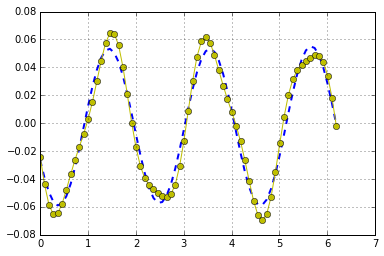

Coefficient values listed below
[ -2.21563552e-03   4.85599835e-05   1.14540120e-03   5.82632037e-02
  -1.55436820e-03  -3.41981772e-04  -1.29970262e-04   9.90027050e-01
   6.74190831e-01]


In [18]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, A4, A5, A6, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta)\
                   + A3*np.cos(3*omega*t + 3*beta) + A4*np.cos(4*omega*t + 4*beta)\
                   + A5*np.cos(5*omega*t + 5*beta) + A6*np.cos(6*omega*t + 6*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[7]*t + p[8]) + p[2]*np.cos(2*p[7]*t + 2*p[8])\
            + p[3]*np.cos(3*p[7]*t + 3*p[8]) + p[4]*np.cos(3*p[7]*t + 3*p[8])\
            + p[5]*np.cos(3*p[7]*t + 3*p[8]) + p[6]*np.cos(3*p[7]*t + 3*p[8])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 2)
plt.plot(t, sol.x, 'y-o')

plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

#### Fit is close but not exact as in previous cases.  

#### Below is the approximated equation.

In [12]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 4))
A1=sp.nsimplify(round(coeff[1], 4))
A2=sp.nsimplify(round(coeff[2], 4))
A3=sp.nsimplify(round(coeff[3], 4))
omega=sp.nsimplify(round(coeff[4], 4))
beta=sp.nsimplify(round(coeff[5], 4))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta) + A3*sp.cos(3*omega*time + 3*beta)
ans

      ⎛2⋅t    3  ⎞          ⎛3⋅t     9  ⎞       
11⋅cos⎜─── + ────⎟   583⋅cos⎜─── + ─────⎟       
      ⎝625   5000⎠          ⎝625   10000⎠    11 
────────────────── + ──────────────────── - ────
      10000                 10000           5000